# Applied Computational Intelligence - HW1

Authors
- Brewton Morais
- Cléber Lucas
- Lucas Abdalah

The goal is to get a good insight into a dataset by mean of summary statistics and visualisations. For this exercise we choose a Kaggle Breast Cancer Datase, available [here](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset).

## Packages and Data Import

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
import seaborn as sns

## Importing data and cleaning it

In [2]:
# Importing a dataframe 
df = pd.read_csv(r"https://raw.githubusercontent.com/lucasabdalah/Exploratory-Data-Analisys/hw1-report/code/hw1/breast-cancer.csv")

df.head(5) # it shows the first 5 rows of the dataframe
# df.tail(5) # it shows the last 5 rows of the dataframe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df = df.drop('id', axis = 1) # drops the id column since it has no importance for us

In [4]:
df.describe() # retrieve descriptive statistics 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# Checking if there are missing values 
df.isnull() is True

# There are no missing values in our dataset

False

## Data Analysis 

In [6]:
# Get a general description of the data by diagnosis (benign or malignant)
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [7]:
# Create a non-scaled df copy for future compairisons if necessary 
df2 = df.copy()

## Compute Z-Score of Data Frame: center and scale data

$$z_i = {x_i - \bar{x} \over \sigma}$$

In [8]:
# Data Preprocessing: apply z-score 

numeric_columns = df.select_dtypes(include=[np.number]).columns # retrieving only numerical columns from dataframe 
df = df[numeric_columns].apply(zscore)

In [9]:
# Display new centered and scaled dataframe (2 first rows)
df.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


In [10]:
# Divide dataframe in two dataframes by diagnosis, then apply normalization technique (z-score)
dfB = df2[df2['diagnosis']=='B']
dfB = dfB[numeric_columns].apply(zscore)
dfM = df2[df2['diagnosis']=='M']
dfM = dfM[numeric_columns].apply(zscore)

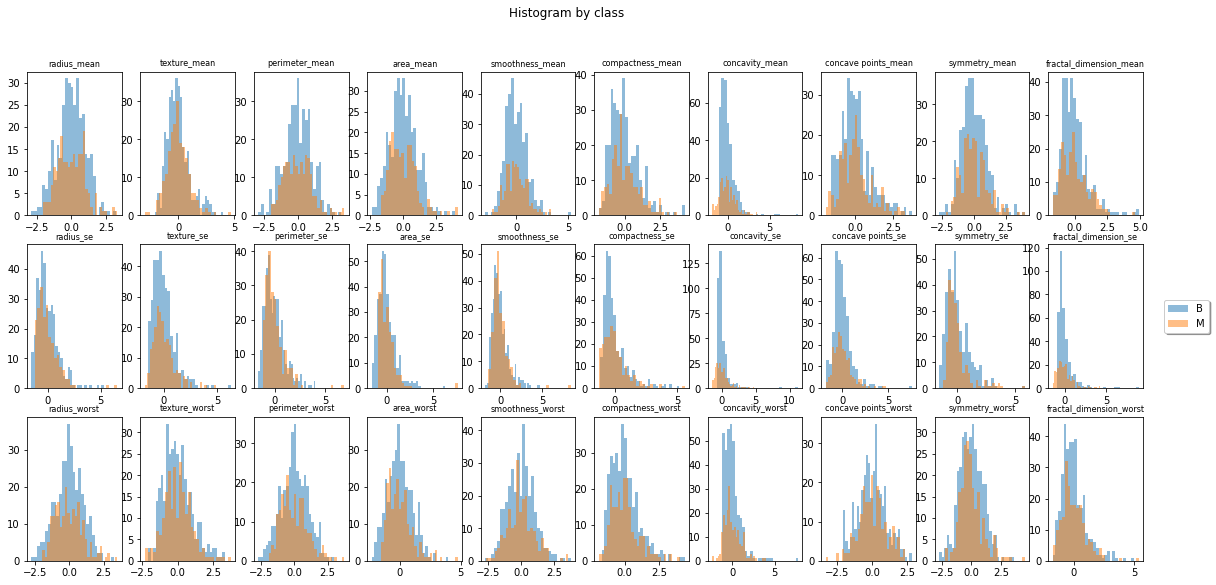

In [40]:
n_rows = 3
n_cols = 10

fig1, axes1 = plt.subplots(n_rows, n_cols, figsize=(20,9))      # create new figure and axes 
i = 0   # counter to interate through numeric columns
for ii in range(n_rows):
        for jj in range(n_cols):
                # print(numeric_columns[i])                
                ax = axes1[ii]
                # Histogram of Beningn and Malignant 
                ax[jj].hist(dfB[numeric_columns[i]], bins = 30, alpha = 0.5, label = 'B')
                ax[jj].hist(dfM[numeric_columns[i]], bins = 30, alpha = 0.5, label = 'M')
                ax[jj].set_title(numeric_columns[i], fontsize = 8)
                
                i += 1
fig1.suptitle('Histogram by class')
plt.legend(loc = 'upper right', bbox_to_anchor = (1.75, 1.85), frameon = True, shadow = True)
plt.show()


In [34]:
# for i in numeric_columns[0:10]:
#     plt.figure(i)
#     plt.hist(dfB[i], bins = 30, alpha = 0.5, label = 'B')
#     plt.hist(dfM[i], bins = 30, alpha = 0.5, label = 'M')
#     plt.title(i)
#     plt.legend(loc='upper right')
#     plt.show()


In [ ]:
# Performing PCA in order to do a dimensionality reduction
pca = PCA(n_components=2)
pca.fit(df[numeric_columns])
print(f'Explained variance ratio: {pca.explained_variance_ratio_} \n')
print(f'Singular Values from SVD: {pca.singular_values_}')

Explained variance ratio: [0.44272026 0.18971182] 

Singular Values from SVD: [86.93235745 56.90677266]


Text(0.5, 1.0, 'Correlation Matrix')

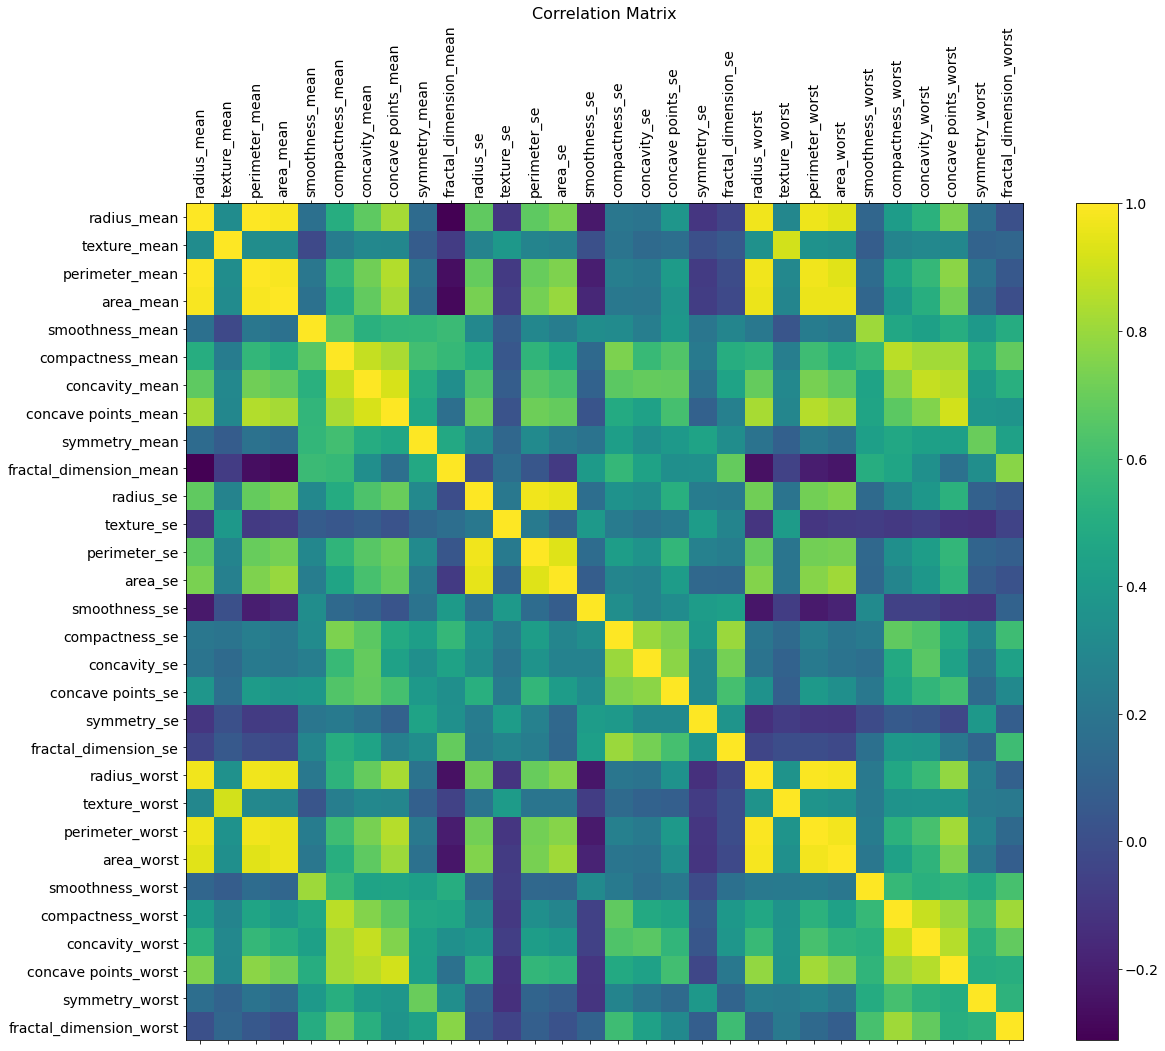

In [ ]:
# Correlation Matrix plot

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df[numeric_columns].shape[1]),df[numeric_columns].columns, fontsize=14, rotation=90)
plt.yticks(range(df[numeric_columns].shape[1]), df[numeric_columns].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

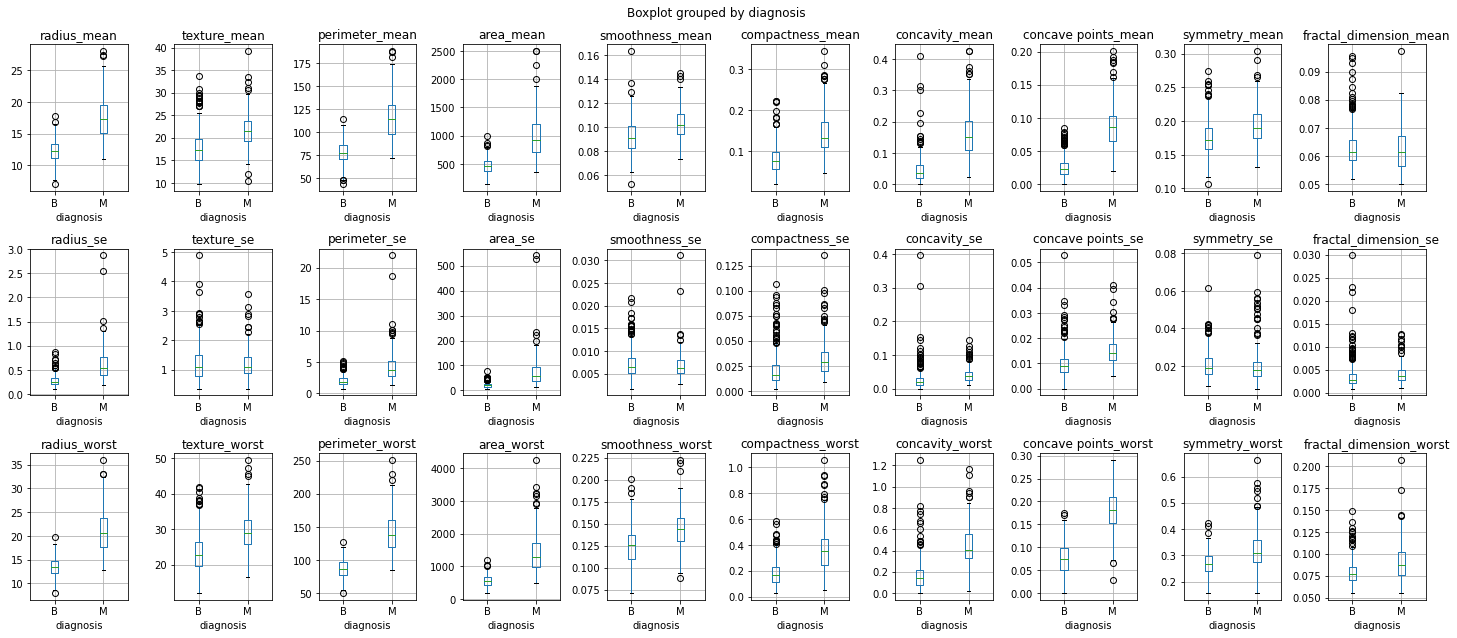

In [87]:
fig2, axes2 = plt.subplots(n_rows, n_cols, figsize = (20, 9))   # create figure and axes

counter = 0 # counter to iterate through numeric columns 
for i in range(n_rows):
    for j in range(n_cols): 
        ax2 = axes2[i]
        df2.boxplot(numeric_columns[counter], by = 'diagnosis', ax = ax2[j]) # boxplot by diagnosis plotted in designated axis 
        counter += 1


plt.tight_layout()
plt.show()
